In [86]:
import pandas as pd
# df.to_csv("Donnees_Nettoyées.csv")
df = pd.read_csv('/Users/josephpelham/Desktop/SISE/Python/Donnees/Donnees_Nettoyées(NA supprimé pour classification).csv')

In [87]:
# Remplacez les NA de Nombre_pieces_principales par la medianne dans chaque modalité de Type_local

result = df.groupby(['Type_local'])['Nombre_pieces_principales'].median().reset_index(name='med')
median_mapping = result.set_index('Type_local')['med'].to_dict()
df['Nombre_pieces_principales'] = df['Nombre_pieces_principales'].fillna(df['Type_local'].map(median_mapping))

In [88]:
# Remplacez les NA de Surface_reelle_bati par la medianne dans chaque modalité de Type_local
res = df.groupby(['Type_local'])['Surface_reelle_bati'].median().reset_index(name='med')
median_mapping = res.set_index('Type_local')['med'].to_dict()
df['Surface_reelle_bati'] = df['Surface_reelle_bati'].fillna(df['Type_local'].map(median_mapping))

In [89]:
# Remplacez les NA de Valeur_fonciere par la medianne dans chaque modalité de Type_local

res = df.groupby(['Type_local'])['Valeur_fonciere'].median().reset_index(name='med')
median_mapping = res.set_index('Type_local')['med'].to_dict()
df['Valeur_fonciere'] = df['Valeur_fonciere'].fillna(df['Type_local'].map(median_mapping))

In [90]:
df['Nature_culture'].fillna(df['Nature_culture'].mode()[0], inplace=True)
df.isna().sum()

Unnamed: 0                        0
No_disposition                    0
Date_mutation                     0
Nature_mutation                   0
Valeur_fonciere                   0
No_voie                        7366
Type_de_voie                  39526
Code_voie                         0
Voie                              0
Code_postal                      24
Commune                           0
Code_departement                  0
Code_commune                      0
Section                          24
No_plan                           0
1er_lot                      227949
Nombre_de_lots                    0
Code_type_local                   0
Type_local                        0
Surface_reelle_bati               0
Nombre_pieces_principales         0
Nature_culture                    0
Surface_terrain              213525
adresse                           0
year                              0
dtype: int64

In [91]:
import pandas as pd
from scipy import stats  # Pour calculer le mode

# faire une fonction pour calculer le mode
def calculate_mode(x):
    try:
        mode = stats.mode(x).mode[0]
        return mode
    except:
        return None

# Group_by 'Commune' et calculer la medianne pour les variables quanti et le mode pour 'Nature_culture'
com_df = df.groupby('Commune').agg({
    'Nombre_pieces_principales': 'median',
    'Surface_reelle_bati': 'median',
    'Valeur_fonciere': 'median',
    'Nature_culture': calculate_mode  # Use the custom function for mode calculation
}).reset_index()
com_df

/var/folders/9h/10k_pkdn42sb6xmd67qywq2r0000gn/T/ipykernel_9833/1733490551.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(x).mode[0]
/var/folders/9h/10k_pkdn42sb6xmd67qywq2r0000gn/T/ipykernel_9833/1733490551.py:7: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode = stats.mode(x).mode[0]


,Commune,Nombre_pieces_principales,Surface_reelle_bati,Valeur_fonciere,Nature_culture
0,ABANCOURT,8.0,192.5,184000.0,S
1,ABAUCOURT,5.0,116.0,141000.0,S
2,ABAUCOURT-HAUTECOURT,3.0,99.0,55100.0,S
3,ABBANS DESSOUS,6.0,138.0,208700.0,S
4,ABBANS DESSUS,2.0,80.0,89000.0,S
...,...,...,...,...,...
25601,ZOUAFQUES,5.0,116.0,118000.0,S
25602,ZUDAUSQUES,5.0,153.0,174600.0,S
25603,ZUTKERQUE,5.0,99.0,165000.0,S
25604,ZUYDCOOTE,5.0,95.0,159000.0,S


In [92]:
com_df.isna().sum()

Commune                      0
Nombre_pieces_principales    0
Surface_reelle_bati          0
Valeur_fonciere              0
Nature_culture               0
dtype: int64

In [93]:
from sklearn import preprocessing
com_df_norm = com_df.copy()
scaler = preprocessing.MinMaxScaler()
com_df_norm[['Nombre_pieces_principales','Surface_reelle_bati','Valeur_fonciere']] = scaler.fit_transform(com_df_norm[['Nombre_pieces_principales','Surface_reelle_bati','Valeur_fonciere']])
com_df_norm = com_df_norm.iloc[:, 1:]
com_df_norm

,Nombre_pieces_principales,Surface_reelle_bati,Valeur_fonciere,Nature_culture
0,0.242424,0.009688,0.000834,S
1,0.151515,0.005838,0.000639,S
2,0.090909,0.004982,0.000250,S
3,0.181818,0.006945,0.000946,S
4,0.060606,0.004026,0.000403,S
...,...,...,...,...
25601,0.151515,0.005838,0.000535,S
25602,0.151515,0.007700,0.000791,S
25603,0.151515,0.004982,0.000748,S
25604,0.151515,0.004781,0.000721,S


In [112]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao',random_state=42)
clusters = kproto.fit_predict(com_df_norm, categorical=[3])
#join data with labels 
com_df_norm['Cluster_Label'] = clusters

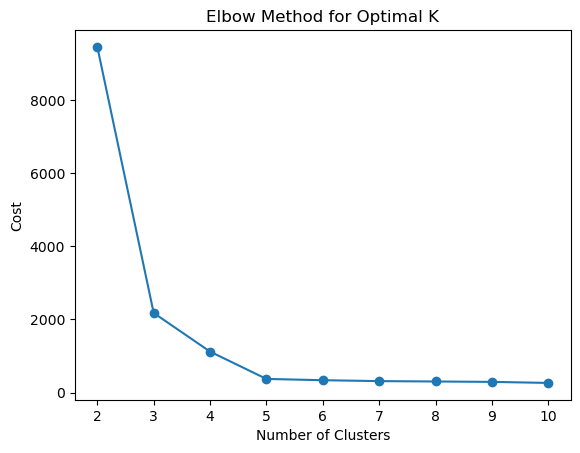

In [59]:
# Boucle pour trouver la meilleure # de clusters 
#from kmodes.kprototypes import KPrototypes
#import matplotlib.pyplot as plt

#costs = []
#K_range = range(2, 8)  # Adjust the range as needed

#for K in K_range:
   # kproto = KPrototypes(n_clusters=K, init='Cao')
   # kproto.fit(com_df_norm, categorical=[3])
   # costs.append(kproto.cost_)

# Plot the cost values
#plt.plot(K_range, costs, marker='o')
#plt.xlabel('Number of Clusters')
#plt.ylabel('Cost')
#plt.title('Elbow Method for Optimal K')
#plt.show()

In [113]:
com_df_norm

,Nombre_pieces_principales,Surface_reelle_bati,Valeur_fonciere,Nature_culture,Cluster_Label
0,0.242424,0.009688,0.000834,S,0
1,0.151515,0.005838,0.000639,S,0
2,0.090909,0.004982,0.000250,S,0
3,0.181818,0.006945,0.000946,S,0
4,0.060606,0.004026,0.000403,S,2
...,...,...,...,...,...
25601,0.151515,0.005838,0.000535,S,0
25602,0.151515,0.007700,0.000791,S,0
25603,0.151515,0.004982,0.000748,S,0
25604,0.151515,0.004781,0.000721,S,0


In [114]:
com_df_norm.Cluster_Label.value_counts()

0    19089
2     5985
1      532
Name: Cluster_Label, dtype: int64

In [111]:
idk.Cluster.value_counts()

0    8886
2    8691
1    3773
Name: Cluster, dtype: int64

In [106]:
com_df['Cluster'] = com_df_norm['Cluster_Label']
com_df

,Commune,Nombre_pieces_principales,Surface_reelle_bati,Valeur_fonciere,Nature_culture,Cluster
0,ABANCOURT,8.0,192.5,184000.0,S,0
1,ABAUCOURT,5.0,116.0,141000.0,S,0
2,ABAUCOURT-HAUTECOURT,3.0,99.0,55100.0,S,0
3,ABBANS DESSOUS,6.0,138.0,208700.0,S,0
4,ABBANS DESSUS,2.0,80.0,89000.0,S,1
...,...,...,...,...,...,...
25601,ZOUAFQUES,5.0,116.0,118000.0,S,0
25602,ZUDAUSQUES,5.0,153.0,174600.0,S,0
25603,ZUTKERQUE,5.0,99.0,165000.0,S,0
25604,ZUYDCOOTE,5.0,95.0,159000.0,S,0


In [107]:
com_df.groupby('Cluster').agg({
    'Nombre_pieces_principales':'median',
    'Surface_reelle_bati':'median',
    'Valeur_fonciere':'median',
    'Nature_culture': calculate_mode}).reset_index()


/var/folders/9h/10k_pkdn42sb6xmd67qywq2r0000gn/T/ipykernel_9833/1733490551.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(x).mode[0]
/var/folders/9h/10k_pkdn42sb6xmd67qywq2r0000gn/T/ipykernel_9833/1733490551.py:7: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode = stats.mode(x).mode[0]


,Cluster,Nombre_pieces_principales,Surface_reelle_bati,Valeur_fonciere,Nature_culture
0,0,4.0,93.0,147500.0,S
1,1,2.0,49.5,108450.0,S
2,2,3.5,93.0,160000.0,AG


In [ ]:
com_df.to_csv("Commune Clusters.csv")